In [124]:
import pandas as pd
import numpy as np
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from imageio import imread

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [100]:
json_path = 'django-labeller/images/10270_JeepGrand Cherokee2015_2400__labels.json'
points_json = pd.read_json(json_path)

In [93]:
points_json

,image_filename,complete,labels
0,10270_JeepGrand Cherokee2015_2400.png,NaN,"{'label_type': 'polygon', 'label_class': 'wind..."
1,10270_JeepGrand Cherokee2015_2400.png,NaN,"{'label_type': 'polygon', 'label_class': 'null..."


In [94]:
df = pd.json_normalize(points_json['labels'])
df

,label_type,label_class,source,regions,object_id,anno_data.good_quality,anno_data.visibility
0,polygon,window,manual,"[[{'x': 1585.1329136194195, 'y': 662.196415234...",c51c8ca5-4a5c-4b42-8129-1fc1ed7af3a6__10,True,mostly
1,polygon,null,manual,"[[{'x': 1291.4021946421522, 'y': 842.658425586...",f1b9b711-6dfb-484e-9bbb-9407b1c3ebf8__4,NaN,NaN


In [96]:
window = pd.json_normalize(df['regions'][0][0])
window_array = np.array(window)

In [97]:
plate = pd.json_normalize(df['regions'][1][0])
plate_array = np.array(plate)

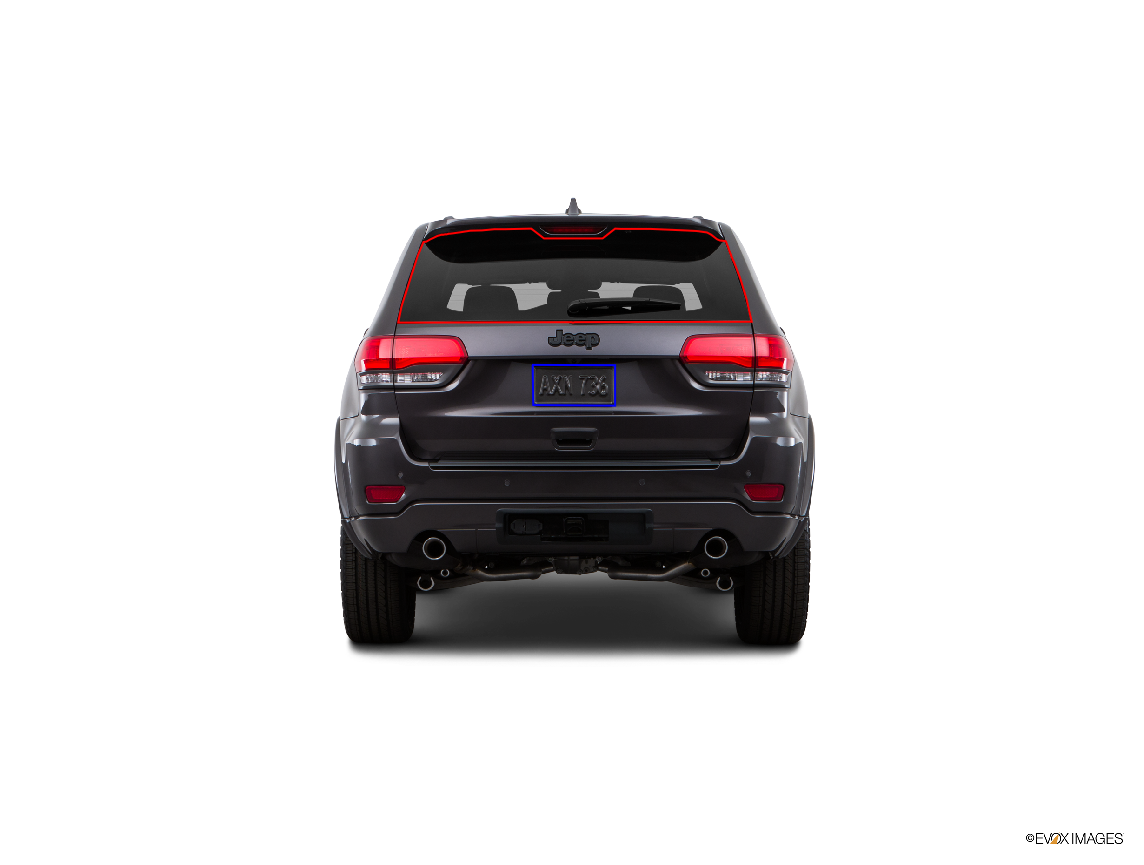

In [125]:
image_path = './django-labeller/images/10270_JeepGrand Cherokee2015_2400.png'
image = imread(image_path)

fig, ax1 = plt.subplots(figsize=(10,10))

ax1.imshow(image)
window_poly = Polygon(window_array, closed=True, ec='r', fill=False)
plate_poly = Polygon(plate_array, closed=True, ec='b', fill=False)
ax1.add_patch(window_poly)
ax1.add_patch(plate_poly)
plt.axis('off');

img_pts = [(x,y) for y in range(img.shape[1]) for x in range(img.shape[0])] or something.  May have to invert y and perhaps swap x and y.  I forget.

In [20]:
image.shape

(1800, 2400, 4)

In [21]:
img_pts = [(x,y) for y in range(image.shape[0]) for x in range(image.shape[1])]


In [30]:
plate_array_path = mplPath.Path(plate_array)
plate_points = plate_array_path.contains_points(img_pts, radius=0.1)
plate_binary = np.array(plate_points.reshape(1800,2400))

In [34]:
window_array_path = mplPath.Path(window_array)
window_points = window_array_path.contains_points(img_pts, radius=0.1)
window_binary = np.array(window_points.reshape(1800,2400), dtype='int')

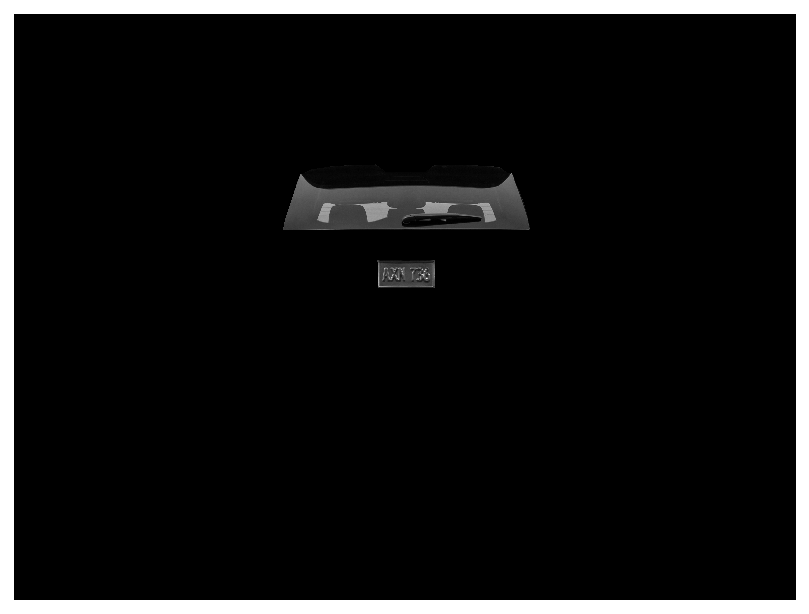

In [158]:
plt.figure(figsize=(7,7))
plt.imshow(image[:,:,0] * (window_binary + plate_binary), cmap='gray')
plt.axis('off');

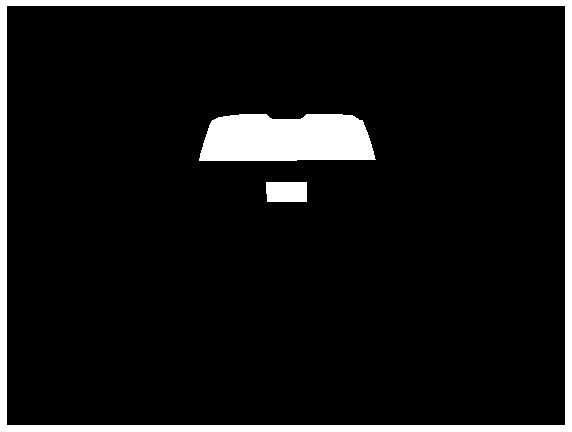

In [37]:
plt.figure(figsize=(10,10))
plt.imshow((window_binary + plate_binary), cmap='gray')
plt.axis('off');

## Function to Get SegNet Ground Truth from JSON File

In [153]:
def get_ground_truth(image_filepath, json_filepath):
    label_nums = {'window':1, 'license':2}
    # image process
    image = imread(image_filepath)
    img_pts = [(x,y) for y in range(image.shape[0]) for x in range(image.shape[1])]

    # json process
    df = pd.read_json(json_filepath)
    json_points = pd.json_normalize(df['labels'])

    window = pd.json_normalize(json_points['regions'][0][0])
    window_array = np.array(window)
    window_array_path = mplPath.Path(window_array)
    window_points = window_array_path.contains_points(img_pts, radius=0.1)
    window_binary = np.array(window_points.reshape(1800,2400), dtype='int')

    plate = pd.json_normalize(json_points['regions'][1][0])
    plate_array = np.array(plate)
    plate_array_path = mplPath.Path(plate_array)
    plate_points = plate_array_path.contains_points(img_pts, radius=0.1)
    plate_binary = np.array(plate_points.reshape(1800,2400), dtype='int')
    # changing masks of labels
    plate_classed = np.where(plate_binary==1, plate_binary+1, plate_binary)

    ground_truth = window_binary + plate_classed

    # plotting
    fig, ((ax0),(ax1),(ax2)) = plt.subplots(3,1, figsize=(15,10))
    ax0.imshow(image)
    ax0.axis('off')
    ax1.imshow(image[:,:,0] * (window_binary + plate_classed), cmap='gray')
    ax1.axis('off')
    ax2.imshow(ground_truth, cmap='gray')
    ax2.axis('off')

    # output ground truth to file
    return ground_truth


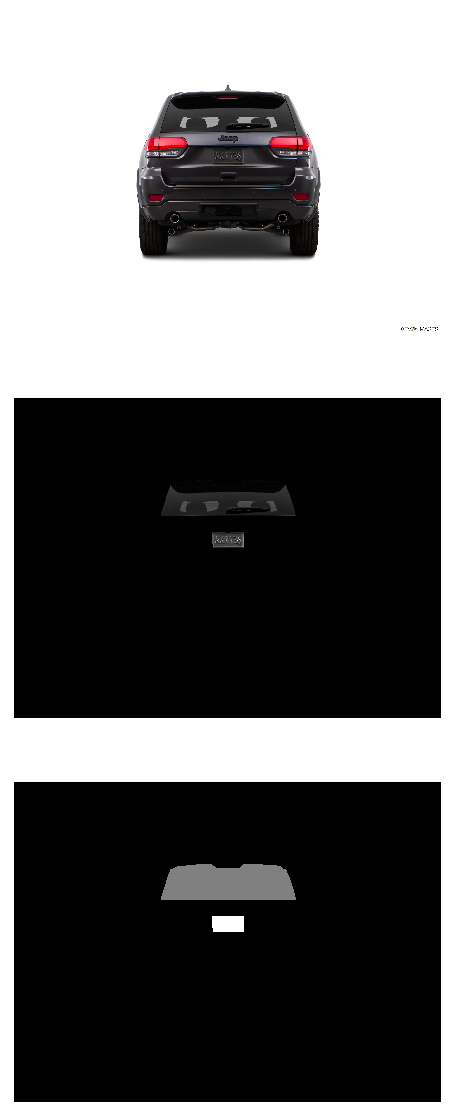

In [154]:
gt_image = get_ground_truth(image_path, json_path)

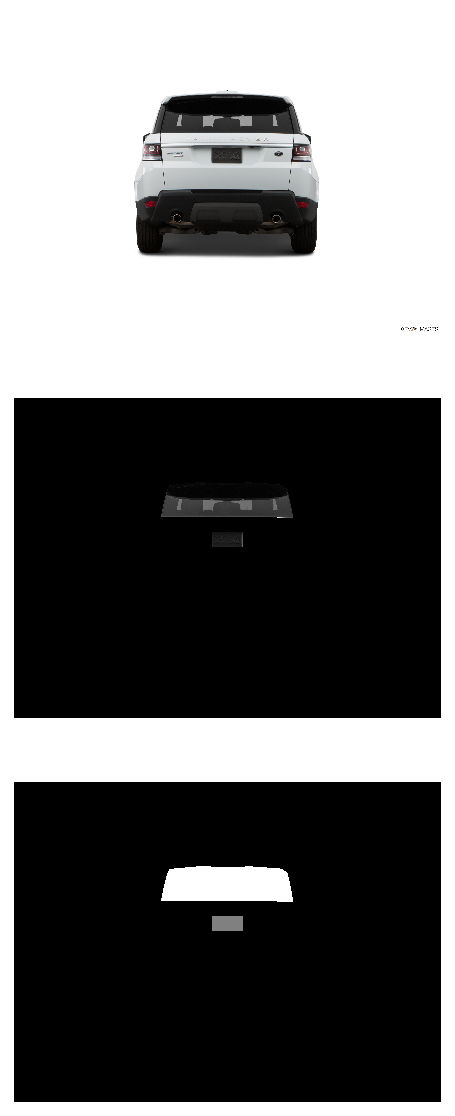

In [157]:
# image 2
image2 = './django-labeller/images/10290_Land RoverRange Rover Sport2015_2400.png'
json2 = './django-labeller/images/10290_Land RoverRange Rover Sport2015_2400__labels.json'

gt_image2 = get_ground_truth(image2, json2)

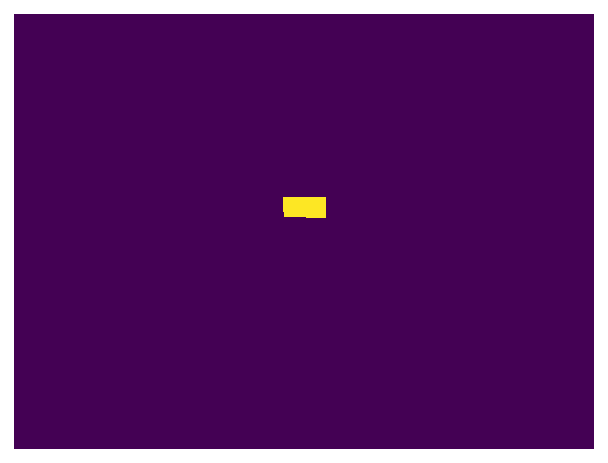

In [151]:
plt.imshow(gt_image==2)
plt.axis('off');

## Segnet Picture Changing Class Example

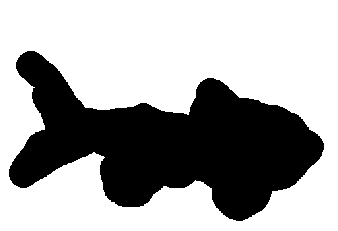

In [111]:
segnet_gt_example = imread('/Users/DanCassin/Downloads/MicrosoftTeams-image.png')
segnet_gt_example = np.array(segnet_gt_example, dtype='int')
plt.imshow(segnet_gt_example, cmap='gray')
plt.axis('off');

In [112]:
np.unique(segnet_gt_example)

array([0, 2])

In [113]:
segnet_gt_example.shape

(323, 481)

In [114]:
# How to change classes using np.where(if condition, what to do, else statement)
segnet_gt_example_2 = np.where(segnet_gt_example==0, segnet_gt_example+1, segnet_gt_example)
            

In [116]:
np.unique(segnet_gt_example_2)

array([1, 2])

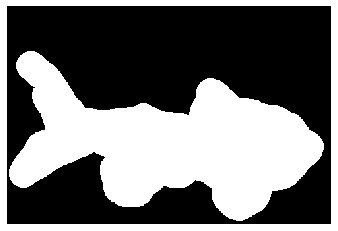

In [91]:
plt.imshow(segnet_gt_example_2==1, cmap='gray')
plt.axis('off');